In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/Player Totals.csv')

In [4]:
data.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,30458,2023,5025,A.J. Green,NaN,SG,23.0,1,NBA,MIL,...,1.000,4.0,22.0,26.0,11,5.0,0.0,7.0,23,106
1,30459,2023,5026,A.J. Lawson,NaN,SG,22.0,1,NBA,TOT,...,0.333,0.0,4.0,4.0,1,0.0,0.0,0.0,3,16
2,30460,2023,5026,A.J. Lawson,NaN,SG,22.0,1,NBA,MIN,...,NaN,0.0,1.0,1.0,0,0.0,0.0,0.0,1,2
3,30461,2023,5026,A.J. Lawson,NaN,SG,22.0,1,NBA,DAL,...,0.333,0.0,3.0,3.0,1,0.0,0.0,0.0,2,14
4,30462,2023,4219,Aaron Gordon,NaN,PF,27.0,9,NBA,DEN,...,0.618,113.0,201.0,314.0,125,35.0,35.0,74.0,88,772


In [5]:
data.tail()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
30960,200,1947,157,Walt Miller,NaN,F,31.0,1,BAA,PIT,...,0.500,NaN,NaN,NaN,6,NaN,NaN,NaN,16,23
30961,201,1947,158,Warren Fenley,NaN,F,24.0,1,BAA,BOS,...,0.511,NaN,NaN,NaN,16,NaN,NaN,NaN,59,85
30962,202,1947,159,Wilbert Kautz,NaN,G-F,31.0,1,BAA,CHS,...,0.534,NaN,NaN,NaN,37,NaN,NaN,NaN,114,253
30963,203,1947,160,Woody Grimshaw,NaN,G,27.0,1,BAA,PRO,...,0.477,NaN,NaN,NaN,1,NaN,NaN,NaN,25,61
30964,204,1947,161,Wyndol Gray,NaN,G-F,24.0,1,BAA,BOS,...,0.581,NaN,NaN,NaN,47,NaN,NaN,NaN,105,350


In [6]:
data.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [7]:
data.describe()

,seas_id,season,player_id,birth_year,age,experience,g,gs,mp,fg,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,30965.000000,30965.000000,30965.000000,2868.000000,30943.000000,30965.000000,30965.000000,22328.000000,29882.000000,30965.000000,...,29731.000000,26308.000000,26308.000000,30071.000000,30965.000000,25339.000000,25340.000000,25330.000000,30965.000000,30965.000000
mean,15483.000000,1994.207944,2593.108316,1944.100418,26.492001,4.949136,48.843565,22.568121,1166.391640,188.488875,...,0.720974,60.164247,145.475521,218.301287,109.580171,38.149927,23.460379,71.508527,110.874374,494.074116
std,8938.969879,20.117063,1273.780544,15.094113,3.831353,3.711172,26.590821,27.902463,928.374251,184.872882,...,0.143342,67.859260,146.786588,225.450589,131.192532,37.674597,35.549036,67.696686,83.878499,485.763443
min,1.000000,1947.000000,1.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7742.000000,1979.000000,1593.000000,1938.000000,24.000000,2.000000,25.000000,0.000000,315.000000,38.000000,...,0.658000,11.000000,32.000000,49.000000,18.000000,8.000000,3.000000,16.000000,35.000000,100.000000
50%,15483.000000,1997.000000,2681.000000,1946.000000,26.000000,4.000000,54.000000,7.000000,995.000000,133.000000,...,0.745000,35.000000,104.000000,153.000000,64.000000,28.000000,11.000000,52.000000,100.000000,346.000000
75%,23224.000000,2011.000000,3627.000000,1951.000000,29.000000,7.000000,74.000000,42.000000,1892.000000,287.000000,...,0.811000,86.000000,210.000000,310.000000,152.000000,57.000000,28.000000,108.000000,174.000000,753.000000
max,30965.000000,2023.000000,5096.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,3882.000000,1597.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,346.000000,456.000000,464.000000,386.000000,4029.000000


In [8]:
lebron = data[data['player'] == 'LeBron James']

In [9]:
print(lebron)

       seas_id  season  player_id        player  birth_year pos   age  \
315      30773    2023       3463  LeBron James         NaN  PF  38.0   
1012     30150    2022       3463  LeBron James         NaN  PF  37.0   
1750     29371    2021       3463  LeBron James         NaN  PG  36.0   
2432     28697    2020       3463  LeBron James         NaN  PG  35.0   
3103     28009    2019       3463  LeBron James         NaN  SF  34.0   
3788     27322    2018       3463  LeBron James         NaN  PF  33.0   
4407     26682    2017       3463  LeBron James         NaN  SF  32.0   
5005     26107    2016       3463  LeBron James         NaN  SF  31.0   
5618     25491    2015       3463  LeBron James         NaN  SF  30.0   
6242     24853    2014       3463  LeBron James         NaN  PF  29.0   
6848     24275    2013       3463  LeBron James         NaN  PF  28.0   
7403     23706    2012       3463  LeBron James         NaN  SF  27.0   
7989     23116    2011       3463  LeBron James    

# This data set is accurate as of Feb 1st 2023, LeBron James has since broken the NBA Scoring Record and is the All-Time Leader in points. Congrats to King James.

In [10]:
lebron_points = lebron['pts'].sum()
print('LeBron James has scored', lebron_points, 'points during his NBA career as of Feb 1st 2023.')

LeBron James has scored 38299 points during his NBA career as of Feb 1st 2023.


In [11]:
lebron = data[data['player'] == 'LeBron James']

In [12]:
lebron['ppg'] = lebron['pts'] / lebron['g']

<ipython-input-12-1fc6c7cf683c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron['ppg'] = lebron['pts'] / lebron['g']


In [13]:
lebron.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,ppg
315,30773,2023,3463,LeBron James,NaN,PF,38.0,20,NBA,LAL,...,49.0,301.0,350.0,293,40.0,24.0,129.0,66,1237,30.170732
1012,30150,2022,3463,LeBron James,NaN,PF,37.0,19,NBA,LAL,...,63.0,396.0,459.0,349,73.0,59.0,196.0,121,1695,30.267857
1750,29371,2021,3463,LeBron James,NaN,PG,36.0,18,NBA,LAL,...,29.0,317.0,346.0,350,48.0,25.0,168.0,70,1126,25.022222
2432,28697,2020,3463,LeBron James,NaN,PG,35.0,17,NBA,LAL,...,66.0,459.0,525.0,684,78.0,36.0,261.0,118,1698,25.343284
3103,28009,2019,3463,LeBron James,NaN,SF,34.0,16,NBA,LAL,...,57.0,408.0,465.0,454,72.0,33.0,197.0,94,1505,27.363636


In [25]:
px.bar(lebron, x= 'season', y='pts', height = 600, width = 1000, title = 'LeBron James Career Scoring',  color ="pts")

In [15]:
px.bar(lebron, x= 'season', y='ppg', height = 600, width = 1000, title = 'LeBron James Career Points Per Game', color = 'ppg')

In [26]:
px.bar(lebron, x = 'season', y='x3p',  height = 600, width = 1000, title = 'LeBron James Career 3PTers', color_discrete_sequence=["green"])

In [27]:
px.bar(lebron, x = 'season', y = 'ft_percent', height = 600, width = 1000, title = 'LeBron James Career FT%', color_discrete_sequence=["red"])

In [18]:
px.bar(lebron, x = 'season', y='ast',  height = 600, width = 1000, title = 'LeBron James Career Assists', color_discrete_sequence=["blue"])

In [19]:
lebron_teams = lebron.groupby(by =['tm']).sum()

In [20]:
lebron_teams.head()

,seas_id,season,player_id,birth_year,age,experience,g,gs,mp,fg,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,ppg
tm,,,,,,,,,,,,,,,,,,,,,
CLE,251006,22115,38093,0.0,280.0,82,849,848.0,33130.0,8369,...,1034.0,5156.0,6190.0,6228,1376.0,695.0,2973.0,1618,23119,299.360254
LAL,147000,10105,17315,0.0,180.0,90,264,264.0,9337.0,2739,...,264.0,1881.0,2145.0,2130,311.0,177.0,951.0,469,7261,138.167731
MIA,95950,8050,13852,0.0,110.0,38,294,294.0,11168.0,2911,...,352.0,1873.0,2225.0,1980,489.0,193.0,993.0,495,7919,107.786024


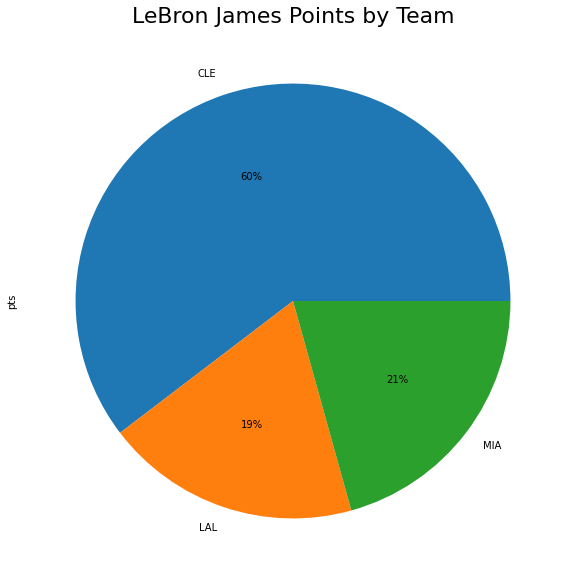

In [21]:
plt.figure(figsize = (20,10))
plt.title('LeBron James Points by Team', fontsize = 22)
lebron_teams['pts'].plot(kind = 'pie', autopct="%.0f%%")

Text(0.5, 1.0, 'LeBron James Career FG%')

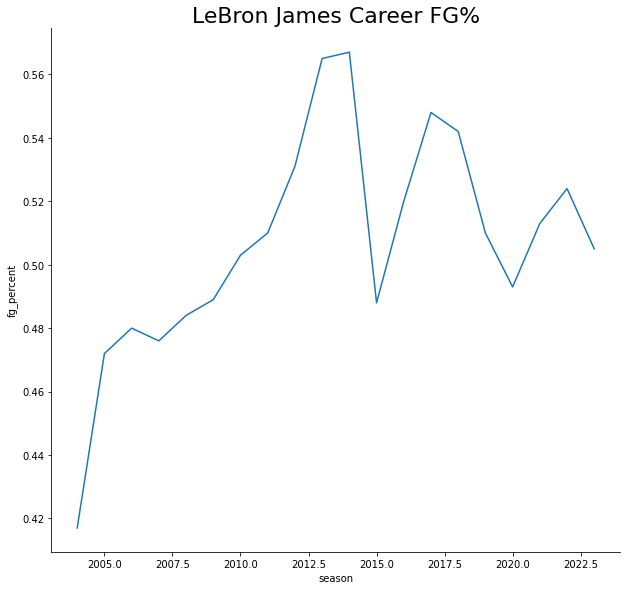

In [22]:
sns.relplot(data=lebron, kind='line', x='season', y='fg_percent',  height = 8, aspect = 1.1)
plt.title('LeBron James Career FG%', fontsize = 22)

Text(0.5, 1.0, 'LeBron James Career Turnovers')

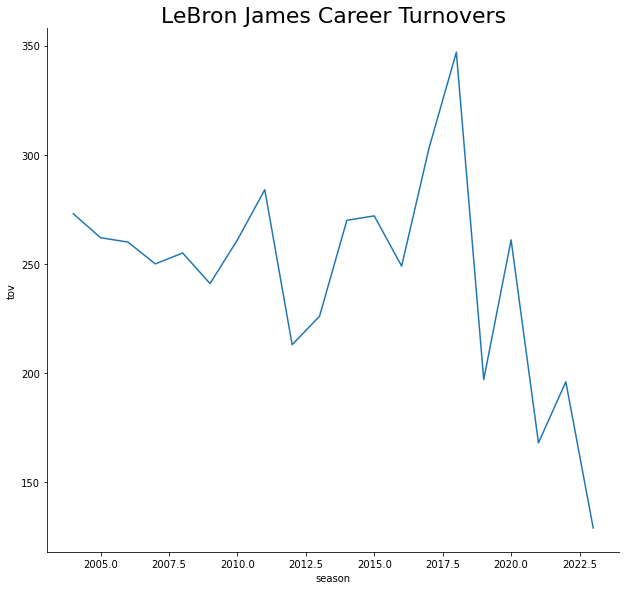

In [23]:
sns.relplot(data=lebron, kind='line', x='season', y='tov',  height = 8, aspect = 1.1)
plt.title('LeBron James Career Turnovers', fontsize = 22)